In [10]:
import pandas as pd
import pvlib
from pvlib.location import Location
import matplotlib.pyplot as plt
import numpy as np
from sympy import*
from scipy.optimize import curve_fit
from scipy import integrate # indlæses også senere i selve opgaven

In [11]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-01-01"
slut_dato = "2024-12-31"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.47092, 12.31168, tidszone, 10, "Danmarks Tekniske Universitet (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Højde er ca 50 m MOH

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:59", inclusive="left", freq=delta_tid, tz=tidszone
)

# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)


### Ny kode

In [12]:
theta_sol = np.deg2rad(solpos.loc["2024-04-20"].zenith.values)
phi_sol = np.deg2rad(solpos.loc["2024-04-20"].azimuth.values)

In [13]:
def solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel):
    theta_sol = np.asarray(theta_sol)
    phi_sol = np.asarray(phi_sol)
    n = 0.185 # n er overførelsen, altså hvor meget energi fra solen er arbejdsom, målt fra når den rammer pannelet til den kommer ind i et andet kredsløb
    u_s = np.stack([
        np.sin(theta_sol) * np.cos(phi_sol),
        np.sin(theta_sol) * np.sin(phi_sol),
        np.cos(theta_sol)
    ], axis=-1)

    u_p = np.array([
        np.sin(theta_panel) * np.cos(phi_panel),
        np.sin(theta_panel) * np.sin(phi_panel),
        np.cos(theta_panel)
    ])
    dot_products = n * np.sum(u_s * u_p, axis=-1)
    return np.maximum(dot_products, 0)

In [14]:
flux_array = np.where(
    theta_sol <= np.pi / 2,
    solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel),
    0.0)

In [15]:
from scipy import integrate

energi = integrate.simpson(flux_array, dx=60)  # i [W·s] eller Joule

In [16]:
energi_Wh = energi / 3600
energi_Wh

0.8947226741301545

In [22]:
phi_panel = np.deg2rad(180)
energier = []
wh_energier = []

for vinkel in range(0, 90):  # 0° til 90°
    theta_panel = np.deg2rad(vinkel)
    flux_array = np.where(
        theta_sol <= np.pi / 2,
        solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel),
        0.0)
    energi = integrate.simpson(flux_array, dx=60)
    energier.append(energi)
    wh_energier.append(energi/3600)


energier # i enheden Joule pr sekunder
wh_energier # i enheden kWh 

[1.1934170213133015,
 1.2068850763248595,
 1.2200821607061019,
 1.2329979092941832,
 1.2456248655979527,
 1.2579498937306488,
 1.2699646713834525,
 1.2816613007373079,
 1.2930320340787704,
 1.3040692799082572,
 1.3147656089993698,
 1.3251175393602308,
 1.3351194261368955,
 1.3447608786319345,
 1.3540401763353005,
 1.3629475205115742,
 1.3714878844479472,
 1.3796481524991562,
 1.3874257394138914,
 1.3948193909689144,
 1.4018239090341287,
 1.4084325011223375,
 1.4146502282637776,
 1.4204661703812806,
 1.4258783925347642,
 1.4308899476170327,
 1.435490413813002,
 1.4396855730495246,
 1.4434649925312037,
 1.4468351427799695,
 1.4497865858933967,
 1.452325013275682,
 1.4544419675618299,
 1.4561429782709259,
 1.4574205694150841,
 1.4582805447249747,
 1.4587152892030795,
 1.4587308071720193,
 1.4583202324829367,
 1.4574894477261287,
 1.456232322198919,
 1.4545546149151984,
 1.452451606264234,
 1.449928233176129,
 1.4469826421727354,
 1.44361528431573,
 1.439829317443601,
 1.4356211498199187,


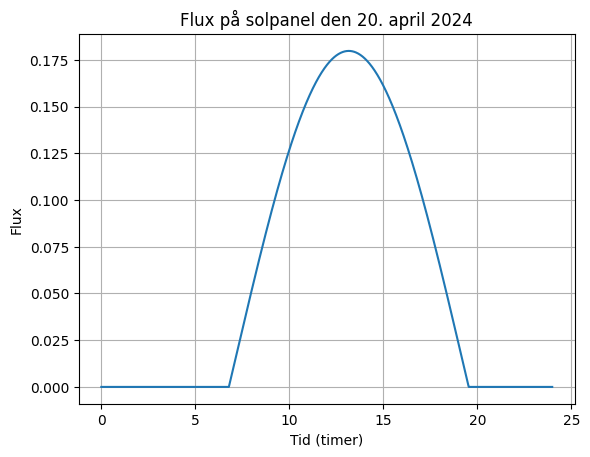

In [23]:
time_index = solpos.loc["2024-04-20"].index
time_array = np.array([t.hour + t.minute/60 for t in time_index])

flux = solar_panel_projection(theta_sol, phi_sol, np.deg2rad(30), np.deg2rad(180))
plt.plot(time_array, flux)
plt.xlabel("Tid (timer)")
plt.ylabel("Flux")
plt.title("Flux på solpanel den 20. april 2024")
plt.grid()
plt.show()

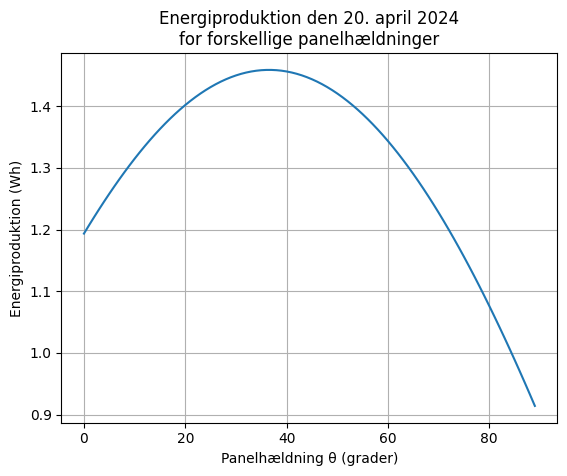

In [ ]:
hældninger = np.arange(0, 90)  # 0° til 90°
plt.plot(hældninger, wh_energier, marker='o')
plt.xlabel("Panelhældning θ (grader)")
plt.ylabel("Energiproduktion (Wh)")
plt.title("Energiproduktion den 20. april 2024\nfor forskellige panelhældninger")
plt.grid(True)
plt.show()